In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [10]:
ds = pd.read_csv('FITNESS.csv', encoding = '949')
ds.loc[1, ['GENDER']] = '여성'
matplotlib.rc('font', family = 'NanumGothic')

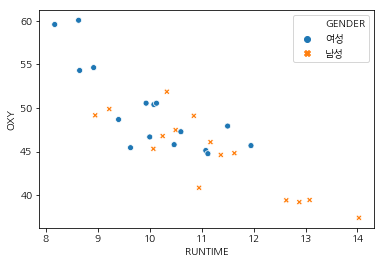

In [11]:

sns.scatterplot(x = 'RUNTIME', y = 'OXY', hue = 'GENDER', style = 'GENDER', data = ds)

## 산소 요구량과 운동 시간은 반비례하며 이에 대한 outlier는 미미하다.  성별에 대한 차이 역시 미미한 것으로 보인다.

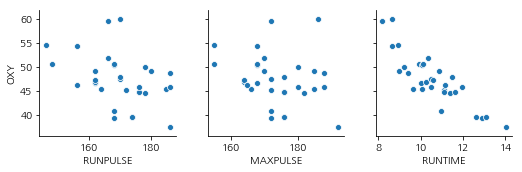

In [13]:
sns.pairplot(ds, y_vars=['OXY'], x_vars=['RUNPULSE', 'MAXPULSE', 'RUNTIME'])

## RUNPULSE나 MAXPULSE는 OXY와 직접적인 상관관계를 보이지 않는 것으로 보인다. 또한 두 그래프가 흡사하게 생긴 것으로 보아서 다중공선성이 있을 것으로 생각되므로, 둘 중 하나를 골라서 새로운 파라미터를 도출 할 수 있는지 확인해야 할 것이다. 하지만 RUNTIME과 OXY는 반비례 관계를 보인다.

In [19]:
ds_1 = pd.read_csv('환율.csv', parse_dates = ['APPL_DATE'])
ds_1_pivot = ds_1.pivot(index = 'APPL_DATE', columns = 'CURRENCY', values = 'STD_RATE')
ds_1_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


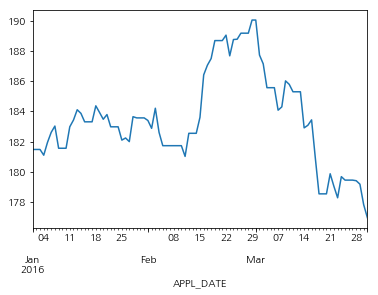

In [20]:
ds_1_pivot['CNY'].plot()

## CNY는 시간에 따른 주목할만한 경향성을 보이지 않는다.

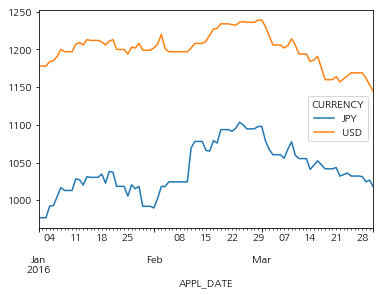

In [21]:
ds_1_pivot[['JPY', 'USD']].plot()

## JPY와 USD는 흡사한 상승, 하강을 보인다. 하지만 JPY의 상승, 하강폭이 USD보다 더 크다.

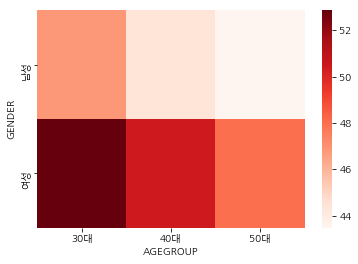

In [27]:
ds_agg = ds.groupby(['GENDER', 'AGEGROUP'], as_index = False).agg('mean')
ds_pivot = ds_agg.pivot(index = 'GENDER', columns = 'AGEGROUP', values = 'OXY')
sns.heatmap(ds_pivot, cmap = 'Reds')

## 남성 여성 모두 연령이 높아질수록 산소 요구량이 적어진다. 여성은 일반적으로 같은 나이대의 남성보다 10% 이상 산소 요구량이 높다

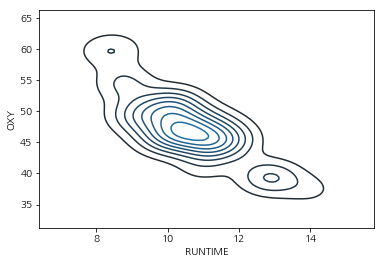

In [28]:
sns.kdeplot(ds['RUNTIME'], ds['OXY'], shade = False)

## 가장 비율이 높은 그룹은 RUNTIME 10~12, OXY 45~50이다.

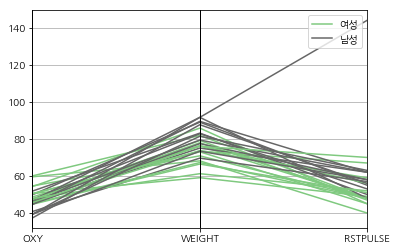

In [29]:
pd.plotting.parallel_coordinates(ds, 'GENDER', cols=['OXY', 'WEIGHT', 'RSTPULSE'], colormap = 'Accent')

## 남성은 몸무게, 휴식시 맥박수가 여성에 비해 높은 편이지만, 산소 요구량은 낮은 편이다. 남성 집단에서 한 샘플은 이상치를 보이고 있다. 

Text(565.4204545454544, 0.5, '혈당 산소 요구량')

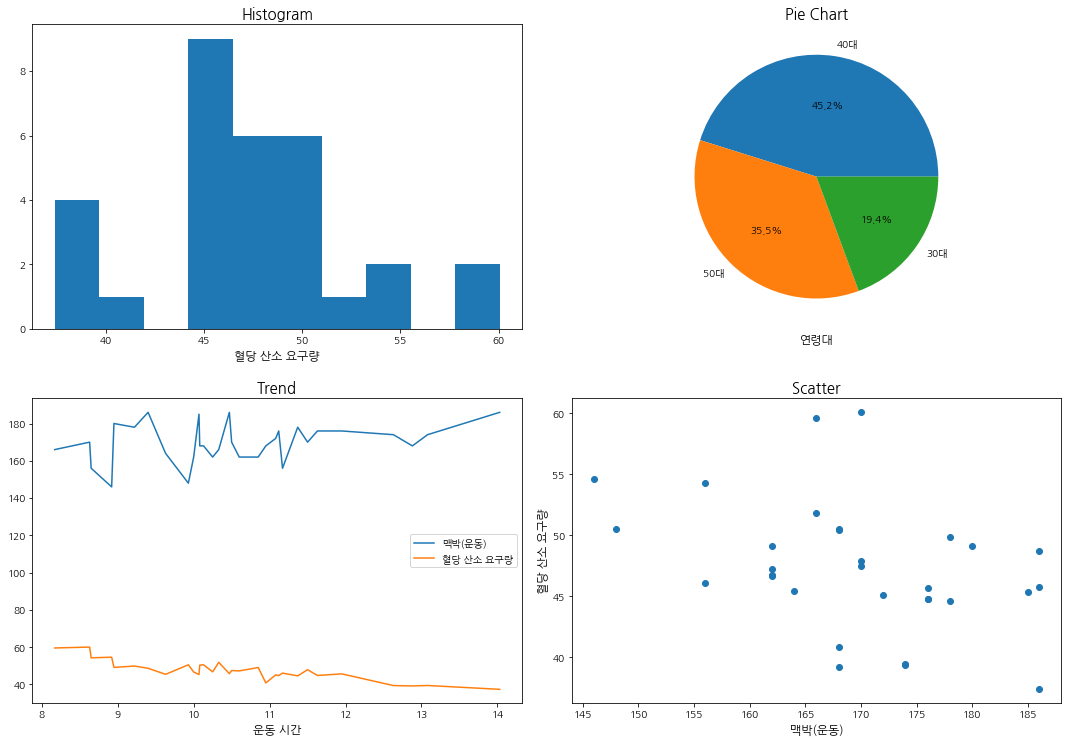

In [40]:
ds_count = ds['AGEGROUP'].value_counts()
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
plt.tight_layout(w_pad = 2, h_pad = 5)

axes[0, 0].hist(ds['OXY'])
axes[0, 0].set_title('Histogram', fontsize = 15)
axes[0, 0].set_xlabel('혈당 산소 요구량', fontsize = 12)

axes[0, 1].pie(ds_count, labels = ds_count.index.tolist(), autopct = '%.1f%%')
axes[0, 1].set_title('Pie Chart', fontsize = 15)
axes[0, 1].set_xlabel('연령대', fontsize = 12)

axes[1, 0].plot('RUNTIME', 'RUNPULSE', data = ds, label = '맥박(운동)')
axes[1, 0].plot('RUNTIME', 'OXY', data=ds, label = '혈당 산소 요구량')
axes[1, 0].set_title('Trend', fontsize = 15)
axes[1, 0].set_xlabel('운동 시간', fontsize = 12)
axes[1, 0].legend()

axes[1, 1].scatter('RUNPULSE', 'OXY', data = ds)
axes[1, 1].set_title('Scatter', fontsize = 15)
axes[1, 1].set_xlabel('맥박(운동)', fontsize = 12)
axes[1, 1].set_ylabel('혈당 산소 요구량', fontsize = 12)

In [41]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

In [42]:
df_raw = pd.read_csv('부품수리시간.csv',)
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


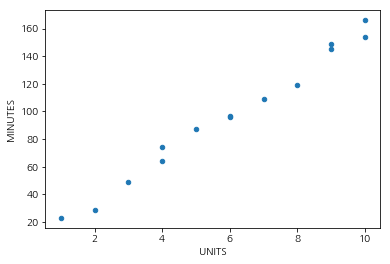

In [43]:
df_raw.plot.scatter(x = 'UNITS', y = 'MINUTES')

## 상관분석 결과

In [44]:
df_raw.corr(method = 'pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


## 표시값 = R value

In [58]:
reg_model = smf.ols(formula = 'MINUTES ~ UNITS', data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           8.92e-13
Time:                        12:11:38   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


## Adjusted R-squared = R-squared divided by the df

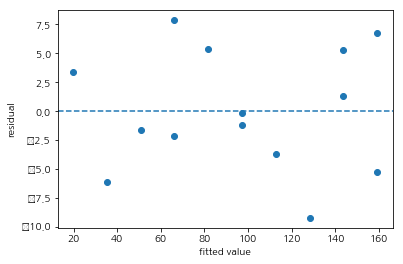

In [47]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0, linestyle = '--')

## residual(잔차)가 특별한 경향성을 보이지 않는 것으로 보아서, 해당 모델은 '일반적으로' 잘 만들어진 모델이다. 

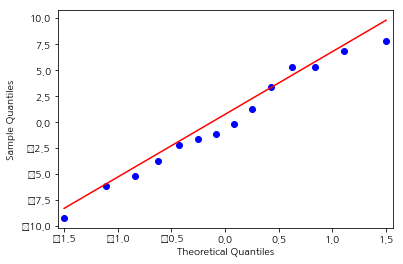

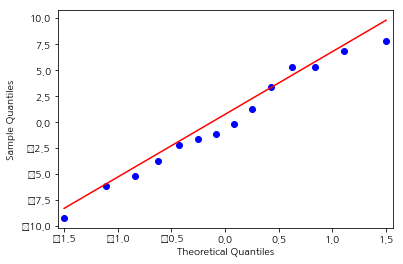

In [48]:
qqplot(reg_result.resid, line = 'q', )

## 잔차가 정규분포를 따르므로 해당 모델은 샘플집단과 선형적인 관계를 띄고 있다.

In [49]:
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0)

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

In [59]:
ds = pd.read_csv('체질검사.csv')
ds.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

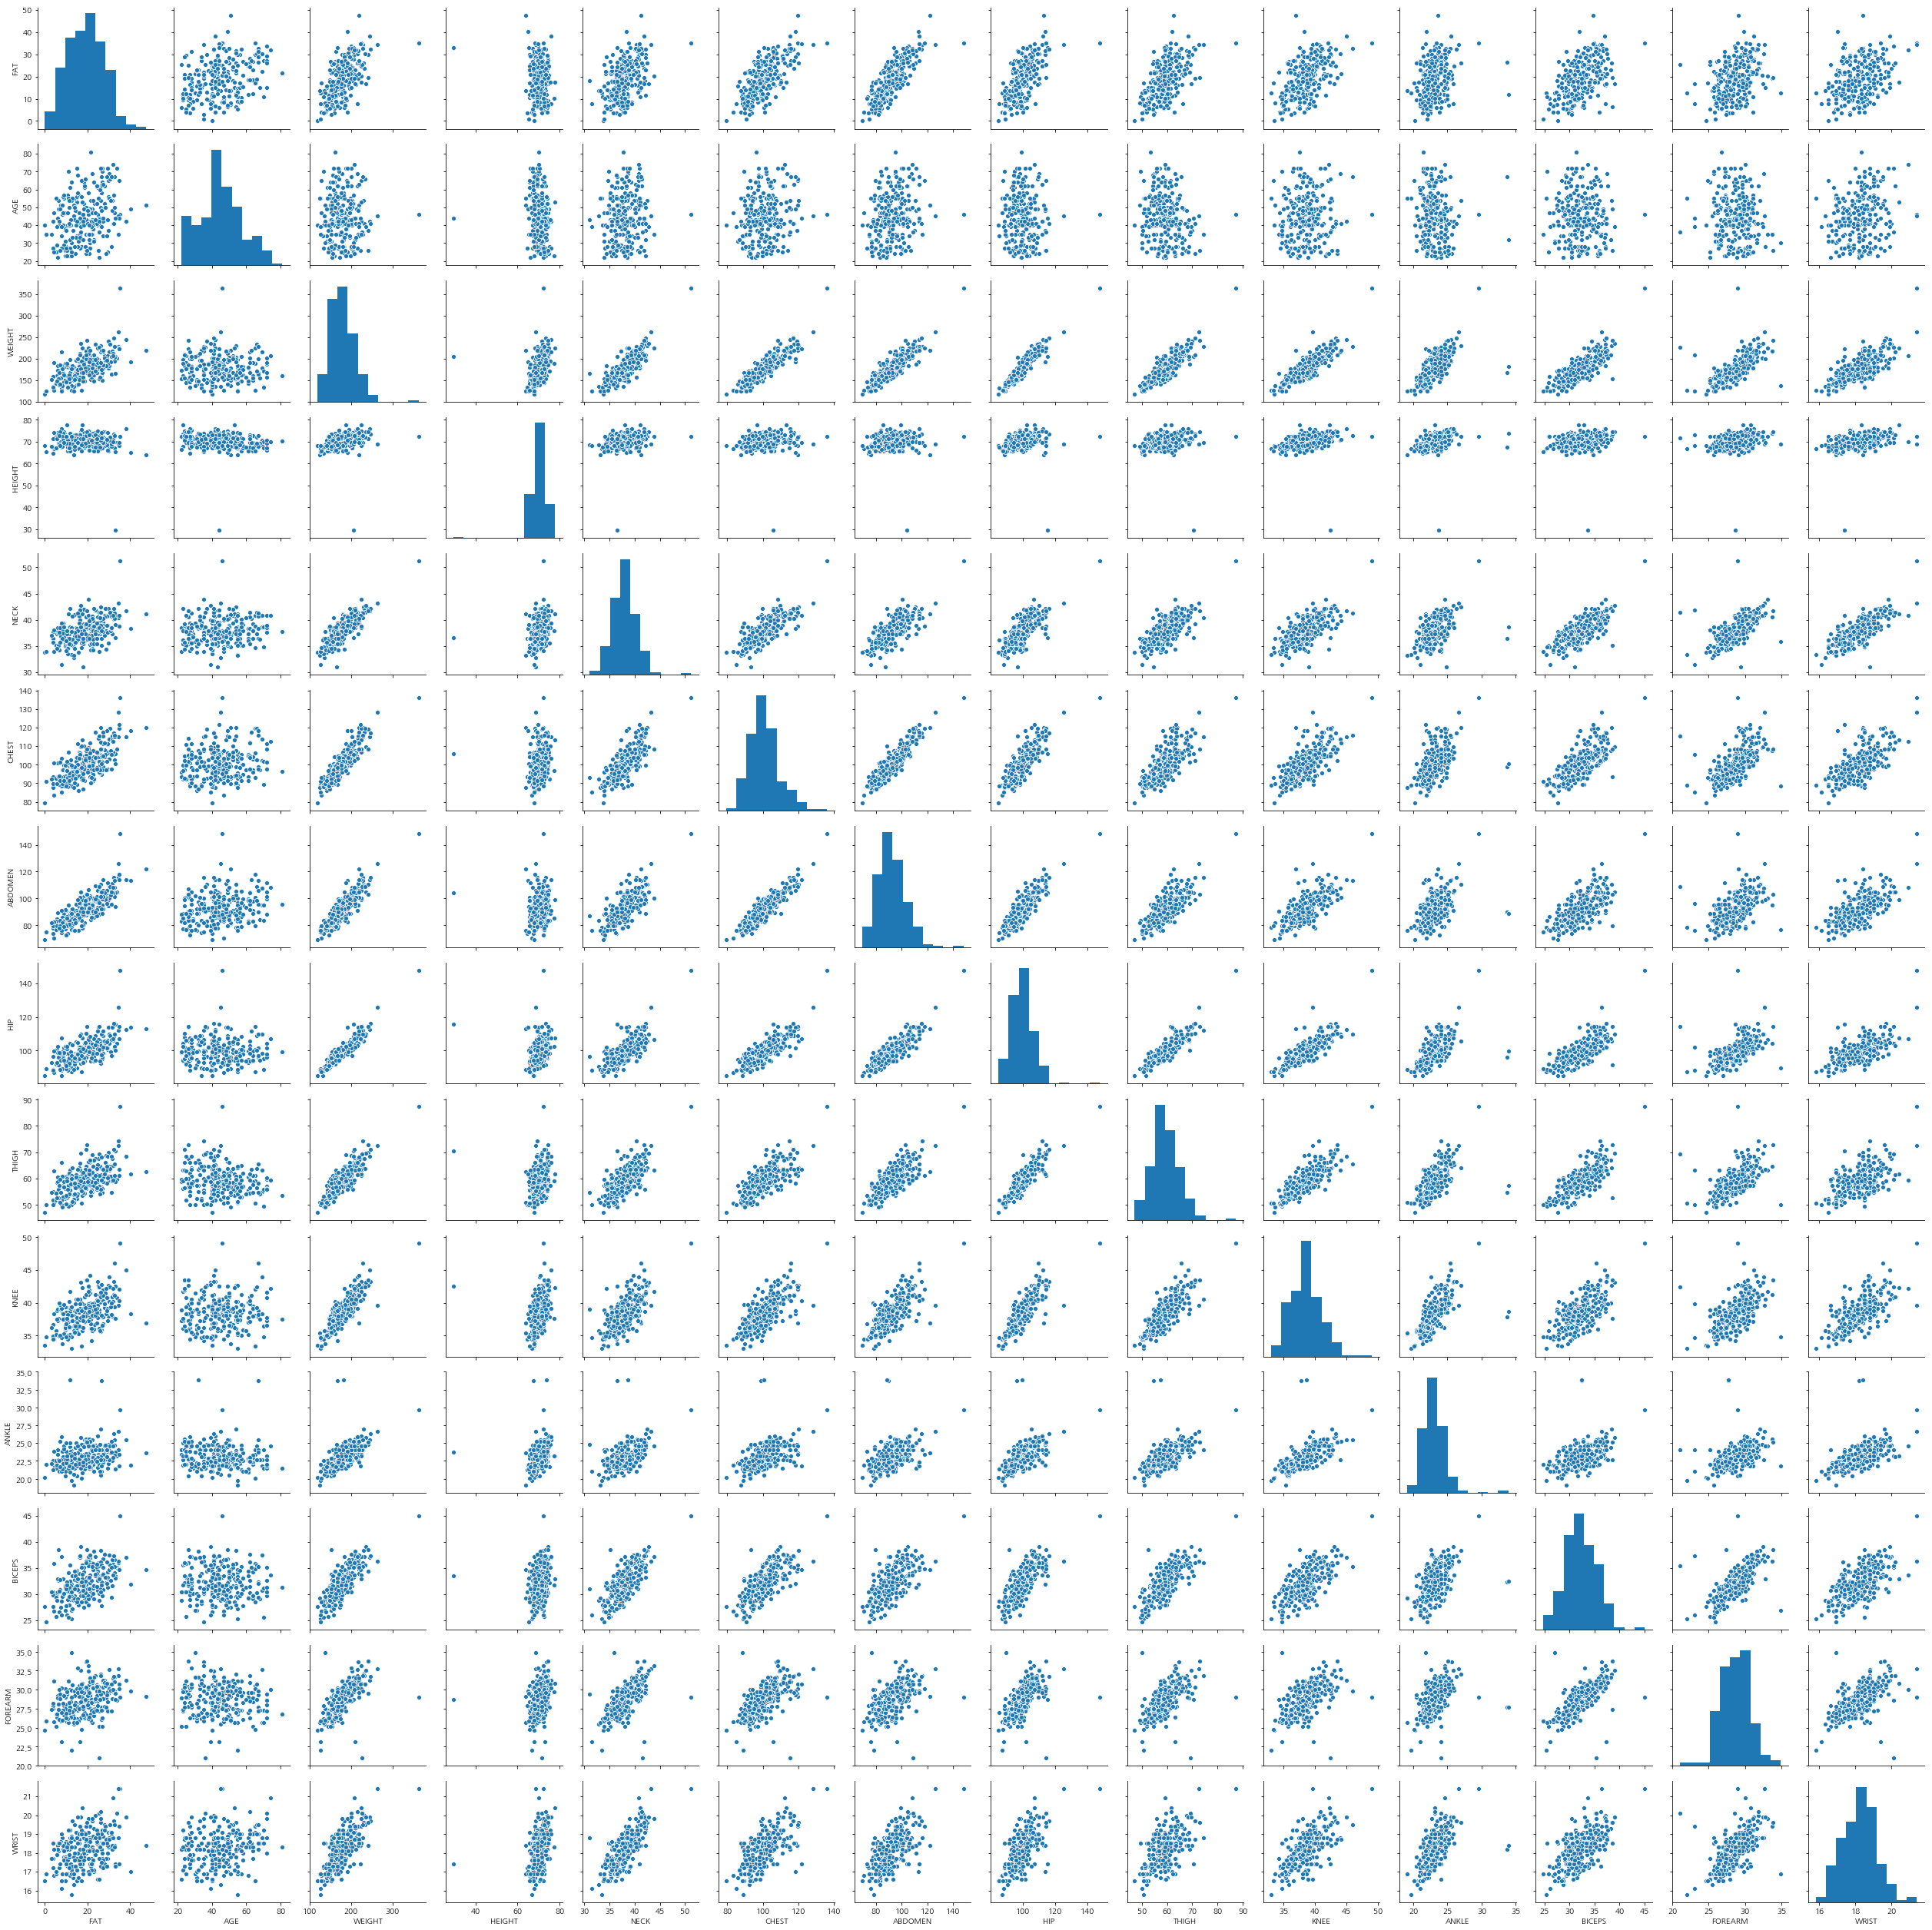

In [61]:
sns.pairplot(ds)

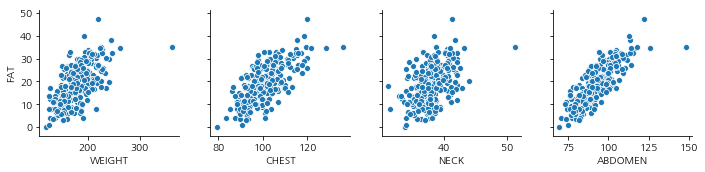

In [62]:
sns.pairplot(ds, y_vars='FAT', x_vars=['WEIGHT', 'CHEST', 'NECK' , 'ABDOMEN'])

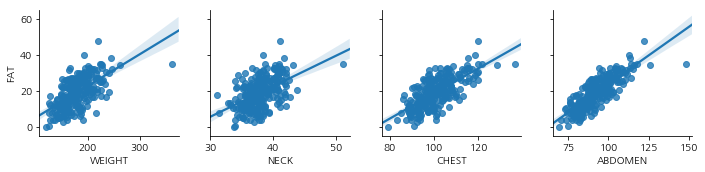

In [63]:
sns.pairplot(ds, y_vars = 'FAT', x_vars = ['WEIGHT', 'NECK', 'CHEST', 'ABDOMEN'], kind = 'reg')

In [64]:
ds.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [66]:
reg_model = smf.ols(formula = 'FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH +\
KNEE + ANKLE + BICEPS + FOREARM + WRIST', data = ds)
re_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           8.92e-13
Time:                        14:09:01   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [67]:
ds_raw_X = ds.drop('FAT', axis = 1)
ds_raw_X_const = add_constant(ds_raw_X)
ds_vif = pd.DataFrame()
ds_vif['variable'] = ds_raw_X_const.columns
# important
ds_vif['VIF'] = [variance_inflation_factor(ds_raw_X_const.values, i) for i in range(ds_raw_X_const.shape[1])]

ds_vif.sort_values('VIF', inplace = True)
ds_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [71]:
ds_raw_X_const['const'].sum()

252.0

In [72]:
reg_model = smf.ols(formula = 'FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH +\
KNEE + ANKLE + BICEPS + FOREARM + WRIST', data = ds)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.75e-64
Time:                        15:20:03   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [74]:
ds_raw_X = ds.drop(['FAT', 'WEIGHT'], axis = 1)
ds_raw_X_const = add_constant(ds_raw_X)
ds_vif = pd.DataFrame()
ds_vif['variable'] = ds_raw_X_const.columns
ds_vif['VIF'] = [variance_inflation_factor(ds_raw_X_const.values, i) for i in range(ds_raw_X_const.shape[1])]
ds_vif.sort_values('VIF', inplace=True)
ds_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [75]:
# page 40
ds_raw_y = ds['FAT']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select=5).fit(ds_raw_X, ds_raw_y)
selected_cols = ds_raw_X.columns[rfe.support_]
removed_cols = ds_raw_X.columns[~rfe.support_]
print(f'Selected Variables : {selected_cols}')
print(f'Removed Variables : {removed_cols}')

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [76]:
rfe_reg_model = smf.ols(formula = 'FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST', data = ds)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           4.38e-68
Time:                        15:48:25   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [77]:
ds_raw_X_rfe = ds_raw_X[selected_cols]
ds_raw_X_rfe_const = add_constant(ds_raw_X_rfe)
ds_rfe_vif = pd.DataFrame()
ds_rfe_vif['variable'] = ds_raw_X_rfe_const.columns
ds_rfe_vif['VIF'] = [variance_inflation_factor(ds_raw_X_rfe_const.values, i) for i in range(ds_raw_X_rfe_const.shape[1])]
ds_rfe_vif.sort_values('VIF', inplace = True)
ds_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


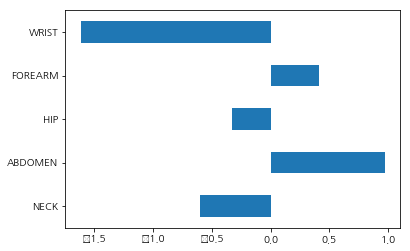

In [78]:
ds_reg_coef = pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]}, index = selected_cols)
ds_reg_coef.plot.barh(y = 'Coef', legend = False)

In [79]:
df = pd.read_csv('DIABETEST.csv')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [133]:
df.describe()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER_1,GENDER_2
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,152.133484,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,0.531674,0.468326
std,77.093005,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,0.499561,0.499561
min,25.000000,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,0.000000,0.000000
25%,87.000000,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,0.000000,0.000000
50%,140.500000,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,1.000000,0.000000
75%,211.500000,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,1.000000,1.000000
max,346.000000,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,1.000000,1.000000


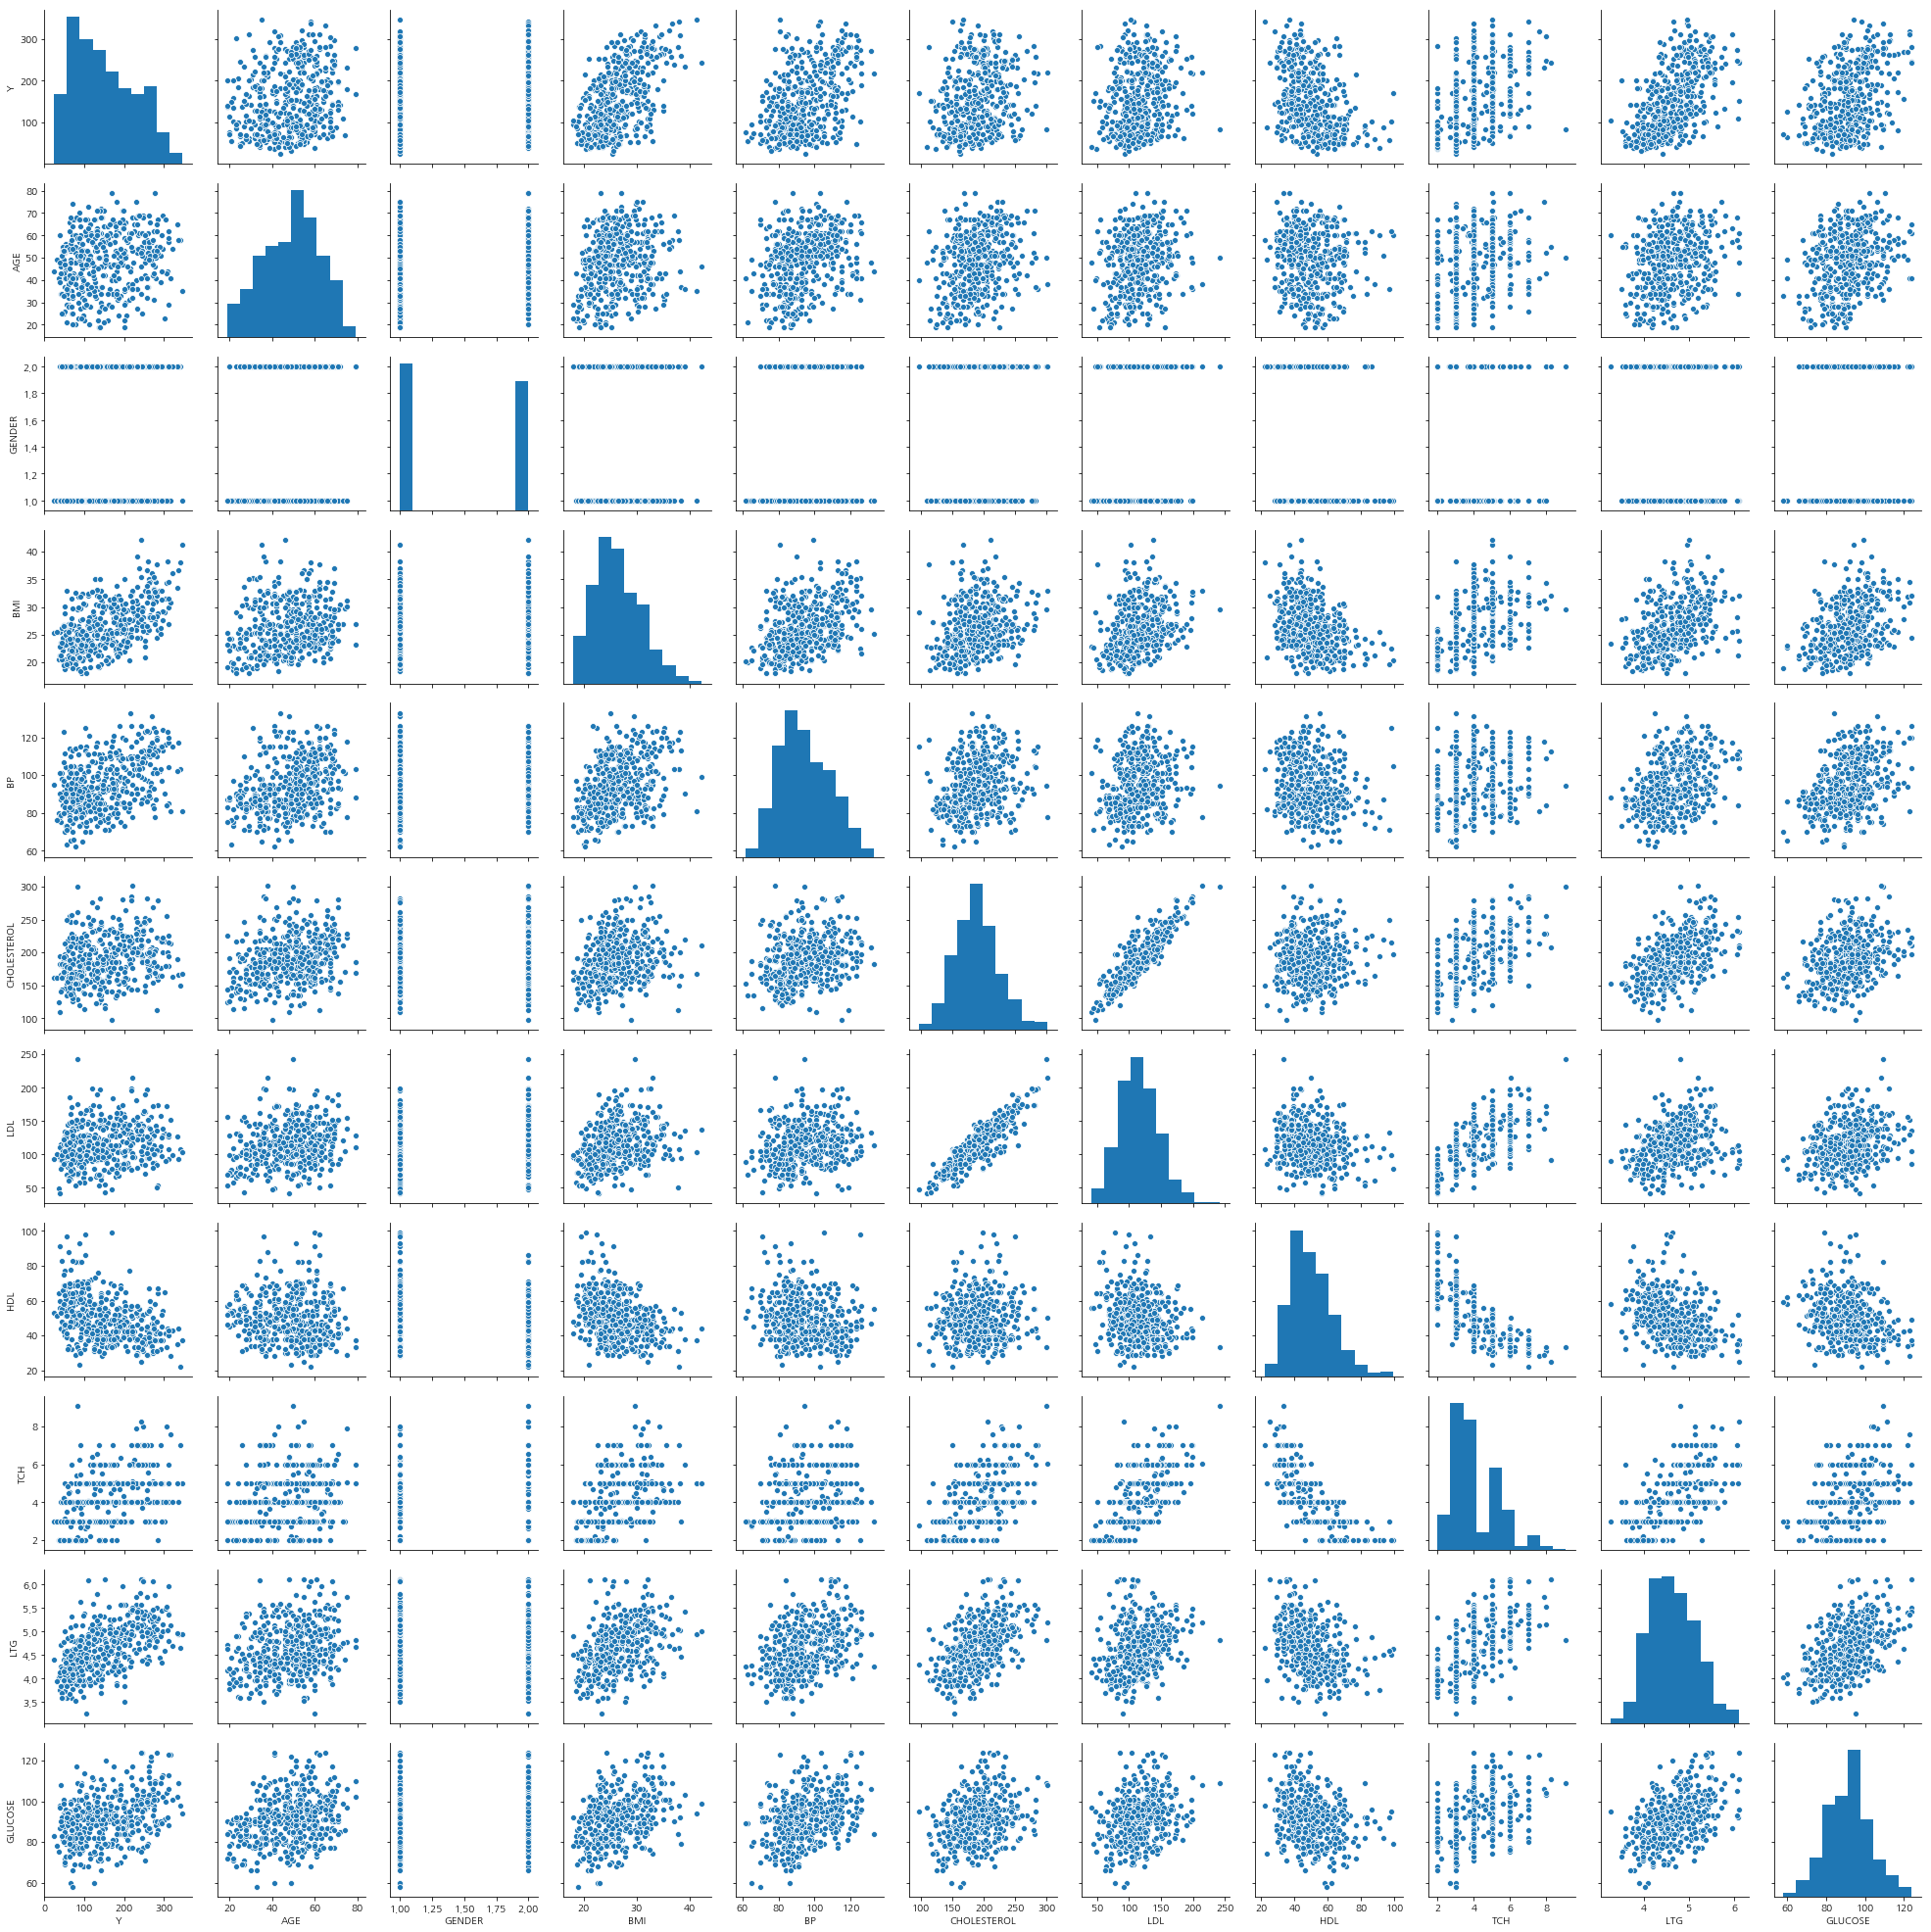

In [80]:
sns.pairplot(df)

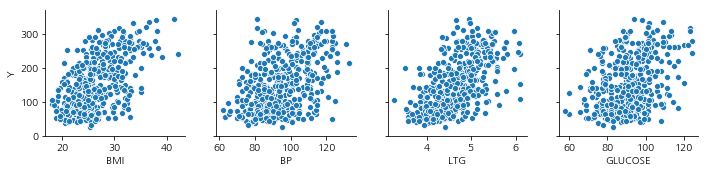

In [83]:
sns.pairplot(df, x_vars=['BMI', 'BP', 'LTG', 'GLUCOSE'], y_vars='Y',)

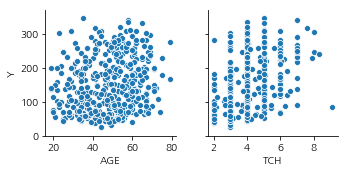

In [102]:
sns.pairplot(df, x_vars=['AGE', 'TCH'], y_vars='Y',)

In [84]:
df.corr()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000000,0.187889,0.043062,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483
AGE,0.187889,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
GENDER,0.043062,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
BMI,0.586450,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
BP,0.441482,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
CHOLESTEROL,0.212022,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
LDL,0.174054,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
HDL,-0.394789,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
TCH,0.430453,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
LTG,0.565883,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669


In [92]:
reg_model = smf.ols(formula = 'Y ~ AGE + GENDER + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE', data=df)
reg_result = reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.83e-62
Time:                        16:33:24   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.5671     67.455     -4.960      0.000    -467.148    -201.986
AGE            -0.0364      0.217     -0.168      0.867      -0.463       0.390
GENDER        -22.8596      5.836     -3.917      0.000     -34.330     -11.389
BMI             5.6030      0.717      7.813      0.000       4.194       7.012
BP              1.1168      0.225      4.958      0.000       0.674       1.560
CHOLESTEROL    -1.0900      0.573     -1.901      0.058      -2.217       0.037
LDL             0.7465      0.531      1.406      0.160      -0.297       1.790
HDL             0.3720      0.782      0.475      0.635      -1.166       1.910
TCH             6.5338      5.959      1.097      0.273      -5.178      18.245
LTG            68.4831     15.670      4.370      0.000      37.685      99.282
GLUCOSE         0.2801      0.273      1.025      0.306      -0.257       0.817
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                     7.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
# features closely correlated = (BMI, BP, TCH, LTG, GLUCOSE)
# seems like some of those features are even more closely related to one another
# reg_model = smf.ols(formula = 'Y ~ BMI + BP + TCH + LTG + GLUCOSE', data=df)
# the line above is commented out due to the P value of TCH being too big
reg_model = smf.ols(formula = 'Y ~ BMI + BP + TCH + LTG', data=df)
reg_result = reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           5.41e-61
Time:                        16:28:23   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -325.7718     27.383    -11.897      0.000    -379.591    -271.952
BMI            6.3567      0.711      8.938      0.000       4.959       7.754
BP             0.9105      0.217      4.198      0.000       0.484       1.337
TCH            2.7170      2.671      1.017      0.310      -2.533       7.967
LTG           45.8925      6.915      6.637      0.000      32.302      59.483
==============================================================================
Omnibus:                       10.528   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.163
Skew:                           0.177   Prob(JB):                       0.0278
Kurtosis:                       2.486   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## R^2 is not supposed to be quite big (> 0.5 or sth like that), which is still alright, since that only explains the LINEAR corr between the features.

In [94]:
df_raw_X = df.drop('Y', axis = 1)
df_raw_X_const = add_constant(df_raw_X)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_X_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_X_const.values, i) for i in range(df_raw_X_const.shape[1])]
# constant 1.0 is added because that is needed in order to run the variance_inflation_factor process
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


In [104]:
reg_model = smf.ols(formula = 'Y ~ AGE + BP + GLUCOSE + BMI + LTG', data=df)
reg_result = reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     81.00
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           5.19e-60
Time:                        16:49:35   Log-Likelihood:                -2402.0
No. Observations:                 442   AIC:                             4816.
Df Residuals:                     436   BIC:                             4840.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -340.6636     27.357    -12.453      0.000    -394.431    -286.896
AGE           -0.2049      0.221     -0.928      0.354      -0.638       0.229
BP             0.9198      0.227      4.049      0.000       0.473       1.366
GLUCOSE        0.2120      0.277      0.764      0.445      -0.333       0.757
BMI            6.4095      0.708      9.047      0.000       5.017       7.802
LTG           48.9678      6.214      7.881      0.000      36.756      61.180
==============================================================================
Omnibus:                        9.471   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                6.530
Skew:                           0.164   Prob(JB):                       0.0382
Kurtosis:                       2.502   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
tmp = df['GENDER']
tmp.head()

0    2
1    1
2    2
3    1
4    1
Name: GENDER, dtype: int64

In [114]:
tmp = pd.get_dummies(tmp, prefix = 'GENDER')

In [115]:
tmp.head()

,GENDER_1,GENDER_2
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [123]:
df.head()
parsed_df = df.drop('GENDER', axis = 1)
# df = df.join(tmp,)
# parsed_df = df.drop('GENDER')
# parsed_df.head()

In [124]:
parsed_df.head()

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER_1,GENDER_2
0,151,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,0,1
1,75,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,1,0
2,141,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,0,1
3,206,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,1,0
4,135,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,1,0


In [125]:
parsed_df.corr()

,Y,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER_1,GENDER_2
Y,1.000000,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,-0.043062,0.043062
AGE,0.187889,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,-0.173737,0.173737
BMI,0.586450,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,-0.088161,0.088161
BP,0.441482,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,-0.241010,0.241010
CHOLESTEROL,0.212022,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,-0.035277,0.035277
LDL,0.174054,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,-0.142637,0.142637
HDL,-0.394789,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,0.379090,-0.379090
TCH,0.430453,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,-0.332115,0.332115
LTG,0.565883,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,-0.149916,0.149916
GLUCOSE,0.382483,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,-0.208133,0.208133


In [127]:
reg_model = smf.ols(formula = 'Y ~ BP + GLUCOSE + BMI + LTG + GENDER_1 + GENDER_2', data=df)
reg_result = reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     83.04
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           3.84e-61
Time:                        16:55:48   Log-Likelihood:                -2399.3
No. Observations:                 442   AIC:                             4811.
Df Residuals:                     436   BIC:                             4835.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -238.1501     18.681    -12.748      0.000    -274.866    -201.434
BP             0.9710      0.224      4.338      0.000       0.531       1.411
GLUCOSE        0.2549      0.275      0.928      0.354      -0.285       0.794
BMI            6.3324      0.705      8.982      0.000       4.947       7.718
LTG           48.8513      6.149      7.945      0.000      36.766      60.937
GENDER_1    -112.2497      9.077    -12.366      0.000    -130.091     -94.409
GENDER_2    -125.9003     10.355    -12.158      0.000    -146.253    -105.548
==============================================================================
Omnibus:                        6.026   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.623
Skew:                           0.138   Prob(JB):                       0.0991
Kurtosis:                       2.582   Cond. No.                     5.97e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
df_raw_X = df.drop(['Y', 'GENDER'], axis = 1)
df_raw_X_const = add_constant(df_raw_X)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_X_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_X_const.values, i) for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values('VIF', inplace = True)

df_raw_y = df['Y']
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=6).fit(df_raw_X, df_raw_y)
selected_cols = df_raw_X.columns[rfe.support_]
removed_cols = df_raw_X.columns[~rfe.support_]

print(f'Selected Variables : {selected_cols}')
print(f'Removed Variables : {removed_cols}')

Selected Variables : Index(['BMI', 'BP', 'TCH', 'LTG', 'GENDER_1', 'GENDER_2'], dtype='object')
Removed Variables : Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [135]:
def minmax(dataframe, *parameters):
    df = dataframe.copy()
    for para in parameters:
        df[para] = (df[para] - df[para].min()) / (df[para].max() - df[para].min())
    return df

In [136]:
parsed_X = parsed_df.drop('Y', axis = 1)
parsed_X = minmax(parsed_X, 'AGE', 'BP', 'CHOLESTEROL', 'LDL', 'HDL', 'TCH', 'LTG', 'GLUCOSE',)
parsed_X.head()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER_1,GENDER_2
0,0.666667,32.1,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0,1
1,0.483333,21.6,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,1,0
2,0.883333,30.5,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0,1
3,0.083333,25.3,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,1,0
4,0.516667,23.0,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,1,0


In [137]:
parsed_X = minmax(parsed_X, 'BMI')

In [138]:
parsed_X.head()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER_1,GENDER_2
0,0.666667,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0,1
1,0.483333,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,1,0
2,0.883333,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0,1
3,0.083333,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,1,0
4,0.516667,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,1,0


In [142]:
parsed_X = parsed_X.join(parsed_df['Y'])
parsed_X.head()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER_1,GENDER_2,Y
0,0.666667,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0,1,151
1,0.483333,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,1,0,75
2,0.883333,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0,1,141
3,0.083333,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,1,0,206
4,0.516667,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,1,0,135


In [143]:
df_raw_X = parsed_X.drop('Y', axis = 1)
df_raw_X_const = add_constant(df_raw_X)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_X_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_X_const.values, i) for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values('VIF', inplace = True)

df_raw_y = parsed_X['Y']
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=11).fit(df_raw_X, df_raw_y)
selected_cols = df_raw_X.columns[rfe.support_]
removed_cols = df_raw_X.columns[~rfe.support_]

print(f'Selected Variables : {selected_cols}')
print(f'Removed Variables : {removed_cols}')

Selected Variables : Index(['AGE', 'BMI', 'BP', 'CHOLESTEROL', 'LDL', 'HDL', 'TCH', 'LTG',
       'GLUCOSE', 'GENDER_1', 'GENDER_2'],
      dtype='object')
Removed Variables : Index([], dtype='object')


/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [144]:
parsed_X.corr()

,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER_1,GENDER_2,Y
AGE,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,-0.173737,0.173737,0.187889
BMI,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,-0.088161,0.088161,0.586450
BP,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,-0.241010,0.241010,0.441482
CHOLESTEROL,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,-0.035277,0.035277,0.212022
LDL,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,-0.142637,0.142637,0.174054
HDL,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,0.379090,-0.379090,-0.394789
TCH,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,-0.332115,0.332115,0.430453
LTG,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,-0.149916,0.149916,0.565883
GLUCOSE,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,-0.208133,0.208133,0.382483
GENDER_1,-0.173737,-0.088161,-0.241010,-0.035277,-0.142637,0.379090,-0.332115,-0.149916,-0.208133,1.000000,-1.000000,-0.043062


In [145]:
reg_model = smf.ols(formula = 'Y ~ BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE  + GENDER_1 + GENDER_2', data=parsed_X)
reg_result = reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     51.53
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           5.25e-63
Time:                        17:27:50   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     432   BIC:                             4833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.1425     20.779     -0.440      0.660     -49.983      31.698
BMI           135.6086     17.334      7.823      0.000     101.539     169.678
BP             78.7839     15.682      5.024      0.000      47.961     109.607
CHOLESTEROL  -221.9979    116.808     -1.901      0.058    -451.581       7.585
LDL           149.1429    106.379      1.402      0.162     -59.942     358.228
HDL            28.2683     60.140      0.470      0.639     -89.935     146.472
TCH            46.4279     42.195      1.100      0.272     -36.505     129.360
LTG           194.6412     44.507      4.373      0.000     107.165     282.118
GLUCOSE        18.0898     17.862      1.013      0.312     -17.017      53.196
GENDER_1        6.9070     10.715      0.645      0.520     -14.153      27.967
GENDER_2      -16.0495     10.858     -1.478      0.140     -37.390       5.291
==============================================================================
Omnibus:                        1.532   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.424
Skew:                           0.019   Prob(JB):                        0.491
Kurtosis:                       2.725   Cond. No.                     3.56e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [152]:
reg_model = smf.ols(formula = 'Y ~ BMI + BP + LDL + LTG  + GENDER_1 + GENDER_2', data=parsed_X)
reg_result = reg_model.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     83.78
Date:                Tue, 30 Apr 2019   Prob (F-statistic):           1.50e-61
Time:                        17:52:22   Log-Likelihood:                -2398.4
No. Observations:                 442   AIC:                             4809.
Df Residuals:                     436   BIC:                             4833.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2836      6.440      0.199      0.842     -11.374      13.941
BMI          159.7032     16.899      9.451      0.000     126.491     192.916
BP            71.9673     15.599      4.614      0.000      41.310     102.625
LDL          -30.9409     18.641     -1.660      0.098     -67.578       5.696
LTG          149.9998     17.087      8.779      0.000     116.417     183.583
GENDER_1       6.7317      3.676      1.831      0.068      -0.494      13.957
GENDER_2      -5.4481      4.713     -1.156      0.248     -14.712       3.815
==============================================================================
Omnibus:                        3.825   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.446
Skew:                           0.146   Prob(JB):                        0.179
Kurtosis:                       2.681   Cond. No.                     5.00e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [154]:
df_raw_X = parsed_X.drop(['Y', 'CHOLESTEROL'], axis = 1)
df_raw_X_const = add_constant(df_raw_X)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_X_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_X_const.values, i) for i in range(df_raw_X_const.shape[1])]
# constant 1.0 is added because that is needed in order to run the variance_inflation_factor process
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,const,0.000
1,AGE,1.217
3,BP,1.457
8,GLUCOSE,1.484
2,BMI,1.502
7,LTG,2.173
4,LDL,2.927
5,HDL,3.737
6,TCH,7.819
9,GENDER_1,inf
